Saving dataset18.csv to dataset18 (6).csv


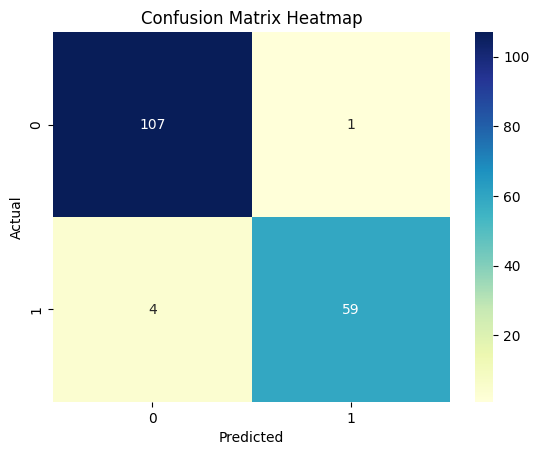

 Evaluation Metrics:
 Accuracy :  0.97
 Precision:  0.98
 Recall   :  0.94

 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [9]:
# -------------------------
#  Step 0: Upload Dataset
# -------------------------
from google.colab import files
uploaded = files.upload()

# Replace with the name of the uploaded file
import pandas as pd
df = pd.read_csv("dataset18.csv")  #  Your actual file

# -------------------------
# 🧹 Step 1: Preprocessing
# -------------------------
# Drop unwanted columns
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")

# Convert target: M = 1 (Malignant), B = 0 (Benign)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# Separate features and target
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# -------------------------
#  Step 2: Model Training
# -------------------------
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# -------------------------
# 🧪 Step 3: Prediction & Evaluation
# -------------------------
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred = model.predict(X_test)

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(" Evaluation Metrics:")
print(f" Accuracy :  {accuracy:.2f}")
print(f" Precision:  {precision:.2f}")
print(f" Recall   :  {recall:.2f}")

print("\n Classification Report:")
print(classification_report(y_test, y_pred))
